In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import config
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

tf.compat.v1.keras.backend.set_session(config.SESS)

1 Physical GPUs, 1 Logical GPUs
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5



In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [5]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5675 - accuracy: 0.0243
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5392 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4621 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.2665 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1233 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0626 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0247 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9920 - accuracy: 0.0552
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9566 - accuracy: 0.0574
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9155 - accuracy: 0.0618
Epoch 11/

Epoch 83/500
15/15 [==============================] - 0s 5ms/step - loss: 2.4187 - accuracy: 0.5497
Epoch 84/500
15/15 [==============================] - 0s 6ms/step - loss: 2.3848 - accuracy: 0.5629
Epoch 85/500
15/15 [==============================] - 0s 5ms/step - loss: 2.3574 - accuracy: 0.5651
Epoch 86/500
15/15 [==============================] - 0s 6ms/step - loss: 2.3321 - accuracy: 0.5784
Epoch 87/500
15/15 [==============================] - 0s 5ms/step - loss: 2.3121 - accuracy: 0.5806
Epoch 88/500
15/15 [==============================] - 0s 7ms/step - loss: 2.2832 - accuracy: 0.5982
Epoch 89/500
15/15 [==============================] - 0s 10ms/step - loss: 2.2629 - accuracy: 0.5960
Epoch 90/500
15/15 [==============================] - 0s 5ms/step - loss: 2.2419 - accuracy: 0.6049
Epoch 91/500
15/15 [==============================] - 0s 6ms/step - loss: 2.2314 - accuracy: 0.6004
Epoch 92/500
15/15 [==============================] - 0s 5ms/step - loss: 2.2117 - accuracy: 0.6004

15/15 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.8543
Epoch 165/500
15/15 [==============================] - 0s 6ms/step - loss: 1.0569 - accuracy: 0.8565
Epoch 166/500
15/15 [==============================] - 0s 5ms/step - loss: 1.0420 - accuracy: 0.8587
Epoch 167/500
15/15 [==============================] - 0s 8ms/step - loss: 1.0295 - accuracy: 0.8631
Epoch 168/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0200 - accuracy: 0.8653
Epoch 169/500
15/15 [==============================] - 0s 6ms/step - loss: 1.0065 - accuracy: 0.8631
Epoch 170/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9953 - accuracy: 0.8609
Epoch 171/500
15/15 [==============================] - 0s 7ms/step - loss: 0.9849 - accuracy: 0.8653
Epoch 172/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9723 - accuracy: 0.8675
Epoch 173/500
15/15 [==============================] - 0s 6ms/step - loss: 0.9597 - accuracy: 0.8698
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.4812 - accuracy: 0.9382
Epoch 246/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.9382
Epoch 247/500
15/15 [==============================] - 0s 7ms/step - loss: 0.4744 - accuracy: 0.9426
Epoch 248/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.9426
Epoch 249/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.9382
Epoch 250/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4617 - accuracy: 0.9404
Epoch 251/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.9404
Epoch 252/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.9382
Epoch 253/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4495 - accuracy: 0.9382
Epoch 254/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4461 - accuracy: 0.9404
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.9492
Epoch 327/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.9470
Epoch 328/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2742 - accuracy: 0.9492
Epoch 329/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2752 - accuracy: 0.9492
Epoch 330/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.9448
Epoch 331/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2720 - accuracy: 0.9492
Epoch 332/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2670 - accuracy: 0.9448
Epoch 333/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.9492
Epoch 334/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2651 - accuracy: 0.9426
Epoch 335/500
15/15 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.9492
Epoc

15/15 [==============================] - 0s 9ms/step - loss: 0.1789 - accuracy: 0.9470
Epoch 408/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.9492
Epoch 409/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.9514
Epoch 410/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1782 - accuracy: 0.9470
Epoch 411/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1762 - accuracy: 0.9470
Epoch 412/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1752 - accuracy: 0.9492
Epoch 413/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.9492
Epoch 414/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1740 - accuracy: 0.9448
Epoch 415/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1732 - accuracy: 0.9470
Epoch 416/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1729 - accuracy: 0.9470
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.1792 - accuracy: 0.9492
Epoch 489/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1701 - accuracy: 0.9514
Epoch 490/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1614 - accuracy: 0.9514
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1556 - accuracy: 0.9514
Epoch 492/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1532 - accuracy: 0.9514
Epoch 493/500
15/15 [==============================] - 0s 7ms/step - loss: 0.1502 - accuracy: 0.9492
Epoch 494/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1484 - accuracy: 0.9492
Epoch 495/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1463 - accuracy: 0.9448
Epoch 496/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1452 - accuracy: 0.9492
Epoch 497/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1434 - accuracy: 0.9514
Epoc

In [6]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

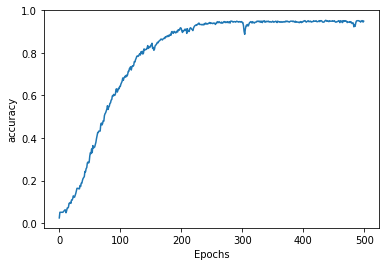

In [7]:
plot_graphs(history, 'accuracy')


In [8]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin round the ceiling would being ogradys daughter call glisten glisten think up relations a call call ned call call call call glisten midst took ball relations relations weeks weeks weeks weeks weeks weeks weeks at at at at at me were entangled mavrone steps ladies mavrone a call murther glisten think together ball up weeks weeks weeks weeks weeks weeks weeks weeks weeks at at at at at me were entangled mavrone steps ladies mavrone a call murther glisten think together ball up weeks weeks weeks weeks weeks weeks weeks weeks weeks at at at at at me were entangled
